In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nptdms import TdmsFile as TF
import datetime
from datetime import timedelta as td
%matplotlib inline

from matplotlib import animation
mpl.rcParams['animation.ffmpeg_path'] = 'C:\\users\\bowenm\\ffmpeg\\bin\\ffmpeg.exe'

##Import everything here
##Note: mpl.rcParams tells python where to find ffmpeg

In [2]:
path = "D:\\Data\\MolyRod"
##This is where i have my data stored. the whole path would look something like:
## "D:\\Data\\MolyRod\\MolyA\\13mm_together.tdms

In [19]:
def buildarray(samples, dist):
    filestr = "\\Moly"+rod+"\\"+dist+"_together.tdms"
    moly = TF(path+filestr)
    motor = moly.object("Motors", "motor A").data
    time = moly.object("Global", "Time").data
    ct1 = moly.object("Spectrometer", "Color Temp 2-3").data
    ct2 = moly.object("Spectrometer", "Color Temp 1-3").data
    ct3 = moly.object("Spectrometer", "Color Temp 1-2").data
    cts = np.vstack((ct1, ct2, ct3))
    ctavg = np.mean(cts, 0)
    tc = moly.object("Sensors", "T_Sample (Arith. Mean)").data
    if len(time)!=len(ctavg) or len(time)!=len(tc) or len(ctavg)!=len(tc):
        time, ctavg = resize(time, ctavg)
        ctavg, tc = resize(ctavg, tc)
    time, tc = resize(time, tc)
    start = np.where(motor[1:]-motor[:-1]>.2)
    start = start[0][1]
    timed = time[start:]
    for i, val in enumerate(time[start:]):
        timed[i] = (time[start+i]-time[start-1]).total_seconds()
    data = np.vstack((time[start:], timed, ctavg[start:], tc[start:]))
    return data

def resize(arr1, arr2):
    if len(arr1)>len(arr2):
        arr1 = arr1[1:]
    elif len(arr1)<len(arr2):
        arr2 = arr2[1:]
    return arr1, arr2
    
def plot_alltc(arrays):
    for rod in arrays:
        data = arrays[rod]
        plot_tc(data, rod)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

def plot_tc(data, rod):
    plt.title("Themocouple Temp.")
    plt.ylabel("Temperatue (C)")
    plt.xlabel("Time (s)")
    plt.plot(data[1], data[3], label = "rod"+rod)
    return
    
def plot_bb(arrays):
    axes = plt.gca()
    plt.title("Black Body Temp")
    plt.ylabel("Temperatue (K)")
    plt.xlabel("Time (s)")
    axes.set_ylim([0,2500])
    axes.set_xlim([0,1300])
    for rod in arrays:
        data = arrays[rod]
        plt.plot(data[1],data[2], label = "Rod"+rod)  
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    return
        

In [4]:
rods = ["A", "B", "C", "D", "E", "F"]
dist = "9mm"
##dist would be 9mm, 11mm, or 13mm
arrays = {}
##a dictionary allows for different sized arrays
for rod in rods:
    arrays[rod] = buildarray(rod, dist)

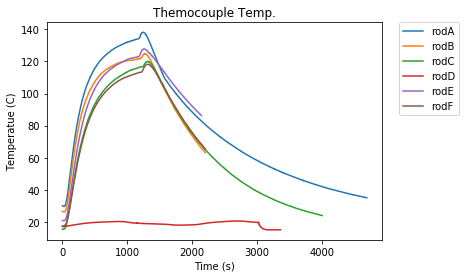

In [9]:
plot_alltc(arrays)

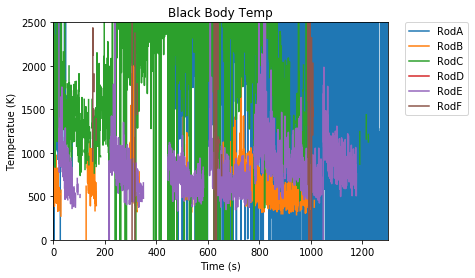

In [20]:
plot_bb(arrays)